In [2]:
#Project 4 ::  House Price Prediction using Machine Learning in Python
#
# Import the required DS - HousePricePrediction.xlsx from github location.
# 
# Install openpyxl library as to import the data from excel format. 
import pandas as pd
houseprediction = pd.read_excel('https://github.com/muthukumaranrprepo/DataAnalyst-Python/blob/main/DataFiles/HousePricePrediction.xlsx?raw=True')
houseprediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [3]:
houseprediction.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


<Axes: >

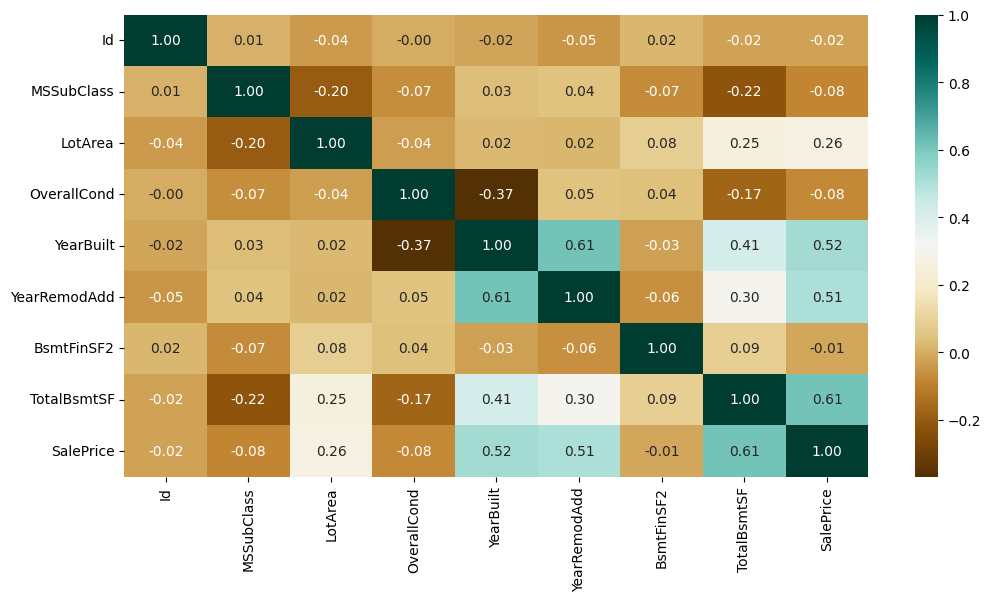

In [4]:
#Case 1 : Create the Heatmap

import seaborn as sns
import matplotlib.pyplot as plt 

#select_dtypes() method to filter numeric columns
numericdf = houseprediction.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(numericdf.corr(), annot=True,cmap = 'BrBG',
            fmt = '.2f',)

The categorical columns are:: Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')


<Axes: xlabel='None'>

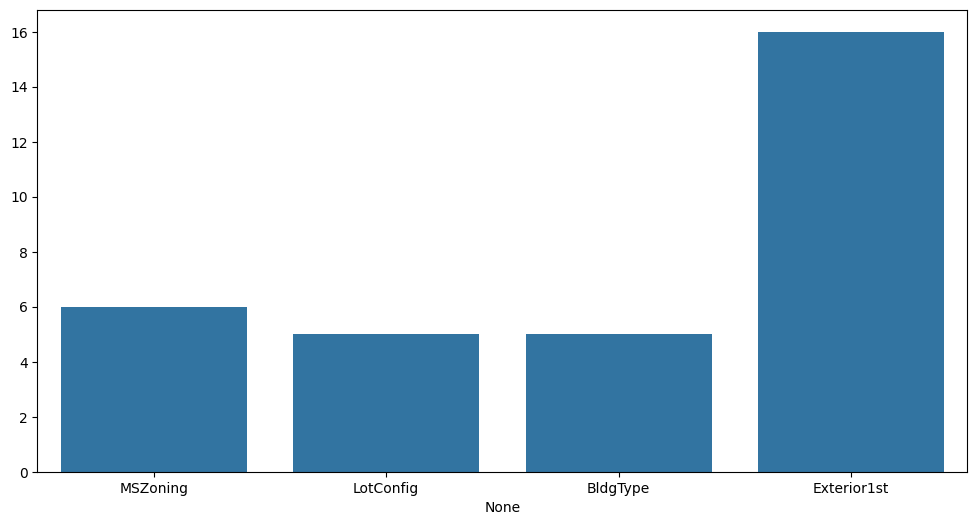

In [5]:
# Case 2: filter the categorical columns and plot the bar chart 
object_cols = houseprediction.select_dtypes(include=['object'])
print('The categorical columns are::',object_cols.columns)

unique_values=[]

for col in object_cols:
    unique_values.append(houseprediction[col].unique().size)

plt.figure(figsize=(12,6))
sns.barplot(x=object_cols.columns, y=unique_values)

In [6]:
object_cols

,MSZoning,LotConfig,BldgType,Exterior1st
0,RL,Inside,1Fam,VinylSd
1,RL,FR2,1Fam,MetalSd
2,RL,Inside,1Fam,VinylSd
3,RL,Corner,1Fam,Wd Sdng
4,RL,FR2,1Fam,VinylSd
...,...,...,...,...
2914,RM,Inside,Twnhs,CemntBd
2915,RM,Inside,TwnhsE,CemntBd
2916,RL,Inside,1Fam,VinylSd
2917,RL,Inside,1Fam,HdBoard


ax1


AttributeError: 'str' object has no attribute 'yaxis'

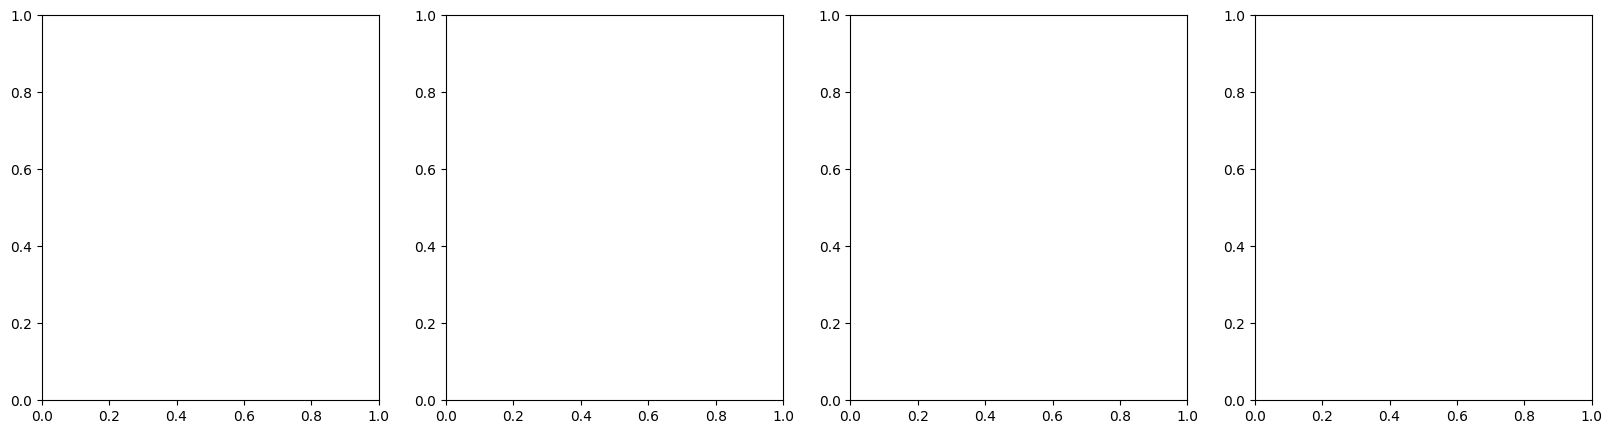

In [58]:
#sns.relplot(x=object_cols['MSZoning'].unique(),y=object_cols['MSZoning'].count,data=object_cols,
#            hue=object_cols['MSZoning'].unique(),kind='line')

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,5))


for col in object_cols:
    a1 = 1
    a = 'ax' + str(a1)
    print(a)
    snap = object_cols[col].value_counts()
    snap.index
    snap.values
    #snapdf = pd.DataFrame(snap)
    sns.barplot(x=snap.index,y=snap.values,ax=a)
    a1 += 1

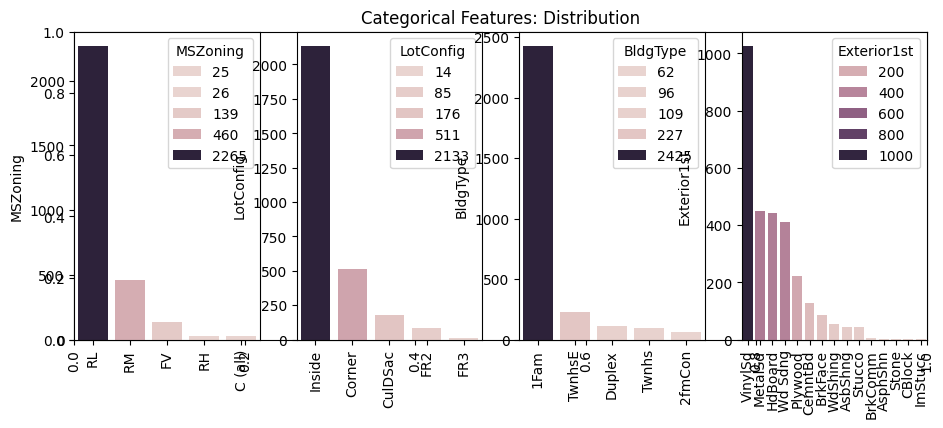

In [10]:
plt.figure(figsize=(11, 4))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols :
    y = object_cols[col].value_counts()
    plt.subplot(1, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y = y,hue=y)
    index+=1


In [11]:
houseprediction.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

<Axes: >

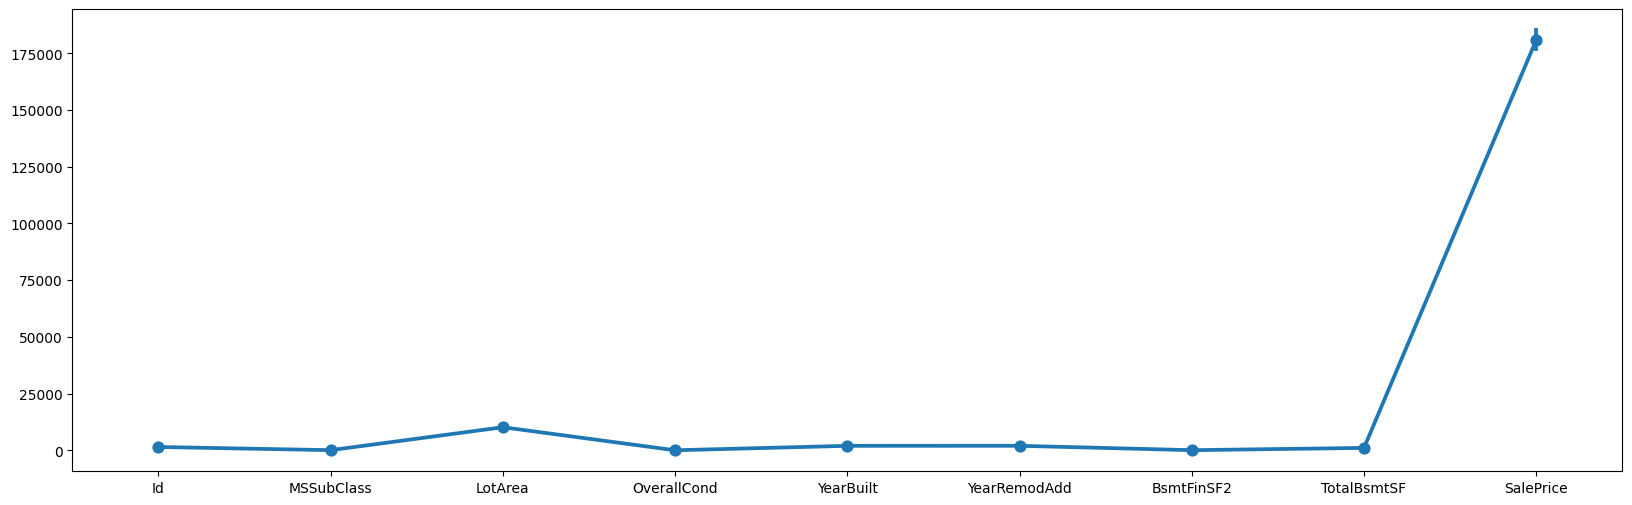

In [14]:
plt.figure(figsize=(20,6))
sns.pointplot(houseprediction)